# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [383]:
# This is given to us by Udacity, it is named: twitter_archive_enhanced.csv I have downloaded from 'project description'

# Importing our needed libraries
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
%matplotlib inline

In [384]:
# loading in the file
df_twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [385]:
# This is also given to us by Udacity, however we must use the `Requests` library to download it from a given URL.

# downloading files using requests
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)

open('image-predictions.tsv','wb').write(r.content)


335079

In [386]:
# load the tsv into a dataframe (making sure to seperate by tab)
df_predicted_images = pd.read_csv('image-predictions.tsv', sep = '\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

### Querying the Twitter API
* Grabbing every tweet's **Retweet** and **Favorite** count using `Tweepy`

    Steps:
    
    * Use tweet IDs from the archive
    * Query the twitter API for each tweet's JSON
    * Store the data in a file called `tweet_json.txt`
    * Each JSON should be written to its own line
    * read the .txt file line by line into pandas DF storing:
        * Tweet ID
        * Retweet Count
        * Favorite Count
        
        
*note: the phone verificaiton has some trouble, so I went ahead and used the file provided by Udacity, I will double check the verification in the future.*

In [387]:
# # BIG NOTE: Oddly, this is also resulting in Fails instead of the real value, so I have uploaded the tweet-json.txt file 
# # which was included next to the code.

# import tweepy
# from tweepy import OAuthHandler
# import json
# from timeit import default_timer as timer

# # Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# # These are hidden to comply with Twitter's API terms and conditions
# consumer_key = 'HIDDEN'
# consumer_secret = 'HIDDEN'
# access_token = 'HIDDEN'
# access_secret = 'HIDDEN'

# auth = OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True)

# # NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# # df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# # change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# # NOTE TO REVIEWER: this student had mobile verification issues so the following
# # Twitter API code was sent to this student from a Udacity instructor
# # Tweet IDs for which to gather additional data via Twitter's API
# tweet_ids = df_twitter_archive.tweet_id.values
# len(tweet_ids)

# # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()
# # Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:
#     # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#     for tweet_id in tweet_ids:
#         count += 1
#         print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#         except tweepy.TweepError as e:
#             print("Fail")
#             fails_dict[tweet_id] = e
#             pass
# end = timer()
# print(end - start)
# print(fails_dict)

In [388]:
# link for this useful code: https://stackoverflow.com/questions/30088006/loading-a-file-with-more-than-one-line-of-json-into-pandas

df_tweets = pd.read_json('tweet-json.txt',lines=True)

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



I will be assessing every file we got above in the same order:
1. We Rate Dogs Archive
2. Tweet Image Predictions
3. Querying the Twitter API

Keys of assessment:
* Completeness
* Validity
* Accuracy
* Consistency 

at the end we will group the issues under Quality and Tidiness

### Asessing We Rate Dogs Archive

#### Visual Assesment
using pandas .head() and .sample()

In [389]:
# It's best to simply look at the head
df_twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [390]:
# It's also beneficial to look at a sample
df_twitter_archive.sample(15)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
865,762316489655476224,NaN,NaN,2016-08-07 15:56:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Scout. He specializes in mid-air freeze frames. 11/10 https://t.co/sAHmwRtfSq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/762316489655476224/photo/1,11,10,Scout,None,None,None,None
40,884562892145688576,NaN,NaN,2017-07-11 00:00:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Kevin. He's just so happy. 13/10 what is your secret Kevin https://t.co/1r4MFCbCX5,NaN,NaN,NaN,https://twitter.com/dog_rates/status/884562892145688576/photo/1,13,10,Kevin,None,None,None,None
580,800459316964663297,NaN,NaN,2016-11-20 22:02:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a very sleepy pupper. Appears to be portable as h*ck. 12/10 would snug intensely https://t.co/61sX7pW5Ca,NaN,NaN,NaN,https://twitter.com/dog_rates/status/800459316964663297/photo/1,12,10,None,None,None,pupper,None
116,870308999962521604,NaN,NaN,2017-06-01 16:00:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Rumble, but he's not ready to. Would rather fall asleep in his bath bucket. 13/10 would attempt a boop without waking https://t.co/MVQCzrF1g9",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/870308999962521604/photo/1,https://twitter.com/dog_rates/status/870308999962521604/photo/1",13,10,Rumble,None,None,None,None
138,865718153858494464,NaN,NaN,2017-05-19 23:57:46 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Boomer. He's just checking pup on you. Hopes you had a good day. If not, he hopes he made it better. 13/10 extremely good boy https://t.co/pozUoHLkGg",NaN,NaN,NaN,https://twitter.com/dog_rates/status/865718153858494464/photo/1,13,10,Boomer,None,None,None,None
1892,674754018082705410,6.747522e+17,4.196984e+09,2015-12-10 00:54:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Just received another perfect photo of dogs and the sunset. 12/10 https://t.co/9YmNcxA2Cc,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674754018082705410/photo/1,12,10,None,None,None,None,None
316,834931633769889797,NaN,NaN,2017-02-24 01:03:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Tucker. He decided it was time to part ways with his favorite ball. We captured the emotional farewell on camera. 12/10 https://t.co/jTe7Y6P0HK,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/834931633769889797/photo/1,https://twitter.com/dog_rates/status/834931633769889797/photo/1,https://twitter.com/dog_rates/status/834931633769889797/photo/1",12,10,Tucker,None,None,None,None
2287,667177989038297088,NaN,NaN,2015-11-19 03:10:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Dasani Kingfisher from Maine. His name is Daryl. Daryl doesn't like being swallowed by a panda. 8/10 https://t.co/jpaeu6LNmW,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667177989038297088/photo/1,8,10,a,None,None,None,None
766,777684233540206592,NaN,NaN,2016-09-19 01:42:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",NaN,NaN,NaN,https://twitter.com/dog_rates/status/777684233540206592/photo/1,12,10,None,None,None,None,None
1450,695816827381944320,NaN,NaN,2016-02-06 03:50:33 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a dog enjoying a sunset. 

#### Programmatic assessment

In [391]:
# Checking .info
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [392]:
# checking for duplicates on the tweet id
df_twitter_archive.tweet_id.duplicated().sum()

0

In [393]:
# checking for denominators that arent 10
np.sort(df_twitter_archive.rating_denominator.unique())

array([  0,   2,   7,  10,  11,  15,  16,  20,  40,  50,  70,  80,  90,
       110, 120, 130, 150, 170])

In [394]:
# checking the number of occurances
df_twitter_archive.rating_denominator.value_counts()

10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

**From what we can see, is that the number of occurances for these numbers are so low, and from the information given in the project details we can say that these might be inforrectly gathered so we have to manually check them.**

In [395]:
# we use this line to print the whole text:
pd.set_option("display.max_colwidth", -1)

# check the rows where the denomintor is not 10:
df_twitter_archive.query('rating_denominator != "10"')[['rating_numerator','rating_denominator']]

,rating_numerator,rating_denominator
313,960,0
342,11,15
433,84,70
516,24,7
784,9,11
902,165,150
1068,9,11
1120,204,170
1165,4,20
1202,50,50


In [396]:
# getting the text for the rows printed above: 
df_twitter_archive.query('rating_denominator != "10"').text

313     @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho                                                                       
342     @docmisterio account started on 11/15/15                                                                                                                                 
433     The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd                                                                      
516     Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
784     RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…                             
902     Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE                        

In [397]:
df_twitter_archive.query('rating_denominator != "10"').expanded_urls

313     NaN                                                                                                                                                                                                                                                            
342     NaN                                                                                                                                                                                                                                                            
433     https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1                                                                
516     https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1                                                                                                     

### Asessing Tweet Image Predictions

#### Visual Assessment

In [398]:
df_predicted_images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [399]:
df_predicted_images.sample(15)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1022,710272297844797440,https://pbs.twimg.com/media/Cdtk414WoAIUG0v.jpg,1,Old_English_sheepdog,0.586307,True,wire-haired_fox_terrier,1.186220e-01,True,Lakeland_terrier,1.068060e-01,True
106,667866724293877760,https://pbs.twimg.com/media/CUS9PlUWwAANeAD.jpg,1,jigsaw_puzzle,1.000000,False,prayer_rug,1.011300e-08,False,doormat,1.740170e-10,False
1743,822859134160621569,https://pbs.twimg.com/media/C2tiAzGXgAIFdqi.jpg,1,malinois,0.332897,True,Chihuahua,1.041160e-01,True,Staffordshire_bullterrier,4.774500e-02,True
355,672594978741354496,https://pbs.twimg.com/media/CVWJkJXWsAInlZl.jpg,1,Great_Pyrenees,0.755945,True,Old_English_sheepdog,8.233680e-02,True,Afghan_hound,2.703660e-02,True
1159,733828123016450049,https://pbs.twimg.com/media/Ci8UxxcW0AYgHDh.jpg,2,beagle,0.472324,True,Walker_hound,1.217790e-01,True,Saint_Bernard,1.146400e-01,True
1553,793165685325201412,https://pbs.twimg.com/media/CwHj-jGWAAAnsny.jpg,1,golden_retriever,0.946224,True,Labrador_retriever,3.647660e-02,True,doormat,2.352850e-03,False
697,684538444857667585,https://pbs.twimg.com/ext_tw_video_thumb/684538367950872576/pu/img/kTKOkSU45BS-fpq8.jpg,1,Chihuahua,0.702583,True,Siamese_cat,6.821810e-02,False,macaque,4.332460e-02,False
1184,738883359779196928,https://pbs.twimg.com/media/CkEKe3QWYAAwoDy.jpg,2,Labrador_retriever,0.691137,True,golden_retriever,1.955580e-01,True,Chesapeake_Bay_retriever,1.958490e-02,True
1237,746790600704425984,https://pbs.twimg.com/media/Cl0iFdeXEAQtPyT.jpg,3,Boston_bull,0.936183,True,guinea_pig,1.008400e-02,False,Cardigan,1.007700e-02,True
1027,710844581445812225,https://pbs.twimg.com/media/Cd1tYGmXIAAoW5b.jpg,1,dingo,0.536593,False,Pembroke,2.004070e-01,True,basenji,6.073450e-02,True


#### Programatic Assessment

In [400]:
df_predicted_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


**2075 predictions where we have 2356 tweets on the archive, therefore we must delete the incompatible ones from the archive**

In [401]:
df_predicted_images.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [402]:
# checking for duplicates on the tweet id
df_predicted_images.tweet_id.duplicated().sum()

0

In [403]:
# checking for duplicates on the jpg_url
df_predicted_images.jpg_url.duplicated().sum()

66

### Asessing Querying Tweets

#### Visual Assessment

In [404]:
df_tweets.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}",39467,False,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_rates', 'location': 'DM YOUR DOGS, WE WILL RATE', 'description': '#1 Source for Professional Dog Ratings | STORE: @ShopWeRateDogs | IG, FB & SC: WeRateDogs MOBILE APP: @GoodDogsGame | Business: dogratingtwitter@gmail.com', 'url': 'https://t.co/N7sNNHAEXS', 'entities': {'url': {'urls': [{'url': 'https://t.co/N7sNNHAEXS', 'expanded_url': 'http://weratedogs.com', 'display_url': 'weratedogs.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 3200889, 'friends_count': 104, 'listed_count': 2784, 'created_at': 'Sun Nov 15 21:41:29 +0000 2015', 'favourites_count': 114031, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True, 'statuses_count': 5288, 'lang': 'en', 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': '000000', 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_tile': False, 'profile_image_url': 'http://pbs.twimg.com/profile_images/861415328504569856/R2xOOfwe_normal.jpg', 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/861415328504569856/R2xOOfwe_normal.jpg', 'profile_banner_url': 'https://pbs.twimg.com/profile_banners/4196983835/1501129017', 'profile_link_color': 'F5ABB5', 'profile_sidebar_border_color': '000000', 'profile_sidebar_fill_color': '000000', 'profile_text_color': '000000', 'profile_use_background_image': False, 'has_extended_profile': True, 'default_profile': False, 'default_profile_image': False, 'following': True, 'follow_request_sent': False, 'notifications': False, 'translator_type': 'none'}"
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGGmo

In [405]:
df_tweets.sample(15)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
312,NaN,NaN,2017-02-24 21:54:03,"[22, 98]","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'jonnysun', 'name': 'jomny sun', 'id': 26259576, 'id_str': '26259576', 'indices': [0, 9]}, {'screen_name': 'Lin_Manuel', 'name': 'Lin-Manuel Miranda', 'id': 79923701, 'id_str': '79923701', 'indices': [10, 21]}], 'urls': []}",NaN,2259,False,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,...,NaN,NaN,NaN,NaN,83,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_rates', 'location': 'DM YOUR DOGS, WE WILL RATE', 'description': '#1 Source for Professional Dog Ratings | STORE: @ShopWeRateDogs | IG, FB & SC: WeRateDogs MOBILE APP: @GoodDogsGame | Business: dogratingtwitter@gmail.com', 'url': 'https://t.co/N7sNNHAEXS', 'entities': {'url': {'urls': [{'url': 'https://t.co/N7sNNHAEXS', 'expanded_url': 'http://weratedogs.com', 'display_url': 'weratedogs.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 3200891, 'friends_count': 104, 'listed_count': 2786, 'created_at': 'Sun Nov 15 21:41:29 +0000 2015', 'favourites_count': 114031, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True, 'statuses_count': 5288, 'lang': 'en', 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': '000000', 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_tile': False, 'profile_image_url': 'http://pbs.twimg.com/profile_images/861415328504569856/R2xOOfwe_normal.jpg', 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/861415328504569856/R2xOOfwe_normal.jpg', 'profile_banner_url': 'https://pbs.twimg.com/profile_banners/4196983835/1501129017', 'profile_link_color': 'F5ABB5', 'profile_sidebar_border_color': '000000', 'profile_sidebar_fill_color': '000000', 'profile_text_color': '000000', 'profile_use_background_image': False, 'has_extended_profile': True, 'default_profile': False, 'default_profile_image': False, 'following': True, 'follow_request_sent': False, 'notifications': False, 'translator_type': 'none'}"
1601,NaN,NaN,2016-01-09 21:58:42,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 685943751555051520, 'id_str': '685943751555051520', 'indices': [117, 140], 'media_url': 'http://pbs.twimg.com/ext_tw_video_thumb/685943751555051520/pu/img/rlBvQWaFPUMx1MTi.jpg', 'media_url_https': 'https://pbs.twimg.com/ext_tw_video_thumb/685943751555051520/pu/img/rlBvQWaFPUMx1MTi.jpg', 'url': 'https://t.co/wbAcvFoNtn', 'display_url': 'pic.twitter.com/wbAcvFoNtn', 'expanded_url': 'https://twitter.com/dog_rates/status/685943807276412928/video/1', 'type': 'photo', 'sizes': {'small': {'w': 340, 'h': 604, 'resize': 'fit'}, 'large': {'w': 720, 'h': 1280, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 600, 'h': 1067, 'resize': 'fit'}}}]}","{'media': [{'id': 685943751555051520, 'id_str': '685943751555051520', 'indices': [117, 140], 'media_url': 'http://pbs.twimg.com/ext_tw_video_thumb/685943751555051520/pu/img/rlBvQWaFPUMx1MTi.jpg', 'media_url_https': 'https://pbs.twimg.com/ext_tw_video_thumb/685943751555051520/pu/img/rlBvQWaFPUMx1MTi.jpg', 'url': 'https://t.co/wbAcvFoNtn', 'display_url': 'pic.twitter.com/wbAcvFoNtn', 'expanded_url': 'https://twitter.com/dog_rates/status/685943807276412928/video/1', 'type': 'video', 'sizes': {'small': {'w': 340

#### Programatic Assessment

In [406]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
id                               2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

In [407]:
df_tweets.describe()

,contributors,coordinates,favorite_count,geo,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str,retweet_count
count,0.0,0.0,2354.000000,0.0,2.354000e+03,2.354000e+03,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,2211.0,2211.0,2.900000e+01,2.900000e+01,2354.000000
mean,NaN,NaN,8080.968564,NaN,7.426978e+17,7.426978e+17,7.455079e+17,7.455079e+17,2.014171e+16,2.014171e+16,0.0,0.0,8.162686e+17,8.162686e+17,3164.797366
std,NaN,NaN,11814.771334,NaN,6.852812e+16,6.852812e+16,7.582492e+16,7.582492e+16,1.252797e+17,1.252797e+17,0.0,0.0,6.164161e+16,6.164161e+16,5284.770364
min,NaN,NaN,0.000000,NaN,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,0.0,0.0,6.721083e+17,6.721083e+17,0.000000
25%,NaN,NaN,1415.000000,NaN,6.783975e+17,6.783975e+17,6.757419e+17,6.757419e+17,3.086374e+08,3.086374e+08,0.0,0.0,7.888183e+17,7.888183e+17,624.500000
50%,NaN,NaN,3603.500000,NaN,7.194596e+17,7.194596e+17,7.038708e+17,7.038708e+17,4.196984e+09,4.196984e+09,0.0,0.0,8.340867e+17,8.340867e+17,1473.500000
75%,NaN,NaN,10122.250000,NaN,7.993058e+17,7.993058e+17,8.257804e+17,8.257804e+17,4.196984e+09,4.196984e+09,0.0,0.0,8.664587e+17,8.664587e+17,3652.000000
max,NaN,NaN,132810.000000,NaN,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,0.0,0.0,8.860534e+17,8.860534e+17,79515.000000


### Quality issues

#### WeRateDogs Archive

1. (1)Type Change: tweet_id from int to string
2. (2)Type Change: timestamp from string to datetime

3. Some ratings have been gathered incorrectly (nominator and denominator) the indices and their problems:


| index| Incorrect | Correct |
| --- | --- | --- |
| 313 | 960 / 0 | 13 / 10 |  
| 342 | 11 / 15 | NOT A RATING |
| 516 | 24 / 7  | NOT A RATING |
| 784 | 9 / 11 | 14 / 10 |
| 1068| 9 / 11 | 14 /10 |
| 1165| 4 / 20 | 13 / 10 |
| 1202| 50 / 50 | 11 / 10 |
| 1662 | 7 / 11 | 10 / 10|
| 2335 | 1 / 2 | 9 / 10|

    - 342, 516, 1598  is not a rating tweet.
    - 784 is retweet of 1068

4. Regulate the nominator and denominator for easier assessment

5. Delete Retweets

#### Tweet Image Predictions

6. (3)Type Change: tweet_id from int to string

7. drop duplicated images (66 duplicated)

8. fix missing values 2075 rows instead of the 2356 in WeRateDogs Archive

#### Querying the Twitter API

9. (4)Type Change: id from int to string

10. Drop: contributors, coordinates, display_text_range, entities, extended_entities, favorited, geo, in_reply_to_screen_name, in_reply_to_status_id, in_reply_to_status_id_str, in_reply_to_user_id, in_reply_to_user_id_str, is_quote_status, lang, place, possibly_sensitive, possibly_sensitive_appealable, quoted_status, quoted_status_id, quoted_status_id_str, retweeted, retweeted_status, source, truncate

 

### Tidiness issues

1. Drop unnecessary columns.

    Drop: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, and retweeted_status_user_id from float to string
Low sample, too many missing values, won't be useful for analysis.


2. doggo, floofer, pupper, and puppo are all under one categorical variable (one variable 4 columns)


3. Create one categorical column for the categorical variable dog breed in image prediciton (and drop unnecessary columns which have been categorized) and other for prediction confidence


4. Merge all three cleaned DataFrames into one master DF

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [408]:
# Make copies of original pieces of data
df_archive_clean = df_twitter_archive.copy()
df_images_clean = df_predicted_images.copy()
df_tweets_clean = df_tweets.copy()

### QUALITY ISSUES

### Cleaning WeRateDogs Archive

### Issue #1: Type Change: tweet_id from int to string
Tweet Image Predictions
+ (3)Type Change: tweet_id from int to string

Querying the twitter API
+ (4)Type Change: id from int to string

#### Define: using the `astype()` method we convert tweet_id from int to string. 

Doing this because we don't want to do any arithmetic operations on the ID.

#### Code

In [409]:
df_archive_clean['tweet_id'] = df_archive_clean['tweet_id'].astype(str)
df_images_clean['tweet_id'] = df_images_clean['tweet_id'].astype(str)
df_tweets_clean['id_str'] = df_tweets_clean['id'].astype(str)

#### Test

In [410]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(2), o

In [411]:
# double checking the object type
assert type(df_archive_clean.tweet_id[0]) is str
assert type(df_images_clean.tweet_id[0]) is str
assert type(df_tweets_clean.id_str[0]) is str

### Issue #2: Type Change: timestamp from string to datetime

#### Define: using the `pd.to_datetime()` method we convert timestamp from string to datetime

#### Code

In [412]:
df_archive_clean.timestamp = pd.to_datetime(df_archive_clean.timestamp)

#### Test

In [413]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](

### Issue #3: Some ratings have been gathered incorrectly (nominator and denominator)

#### Define: incorrect gathering or scraping of the ratings. We're given the corrected ones in the assessing stage (issue 3). We will be replacing the incorrect nominator and denominator with the correct ones.
Some of these are not a rating which will be also resolved here
the retweeted one will be on a different issue.

In [414]:
# First let's drop the rows with no rating
no_ratings = [342, 516, 1598]

for index in no_ratings:
    df_archive_clean.drop(index, inplace = True)

In [415]:
# now we edit our incorrect rows
corrections = {
    313: [13,10],
    784: [14,10],
    1068: [14,10],
    1165: [13,10],
    1202: [11,10],
    1162: [10,10],
    2335: [9, 10]
}
# this stack overflow post helped me overcome an error with assigning:
# https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas

for key, value in corrections.items():
    df_archive_clean.loc[key,'rating_numerator' ] = value[0]
    df_archive_clean.loc[key, 'rating_denominator'] = value[1]    

#### Test

In [416]:
# correct is 2353 rows because we dropped 3
assert df_archive_clean.shape == (2353,17)

In [417]:
# Test by checking each index fits to their corresponding value:
for key, value in corrections.items():
    assert df_archive_clean.loc[key].rating_numerator == value[0]
    assert df_archive_clean.loc[key].rating_denominator == value[1]

In [418]:
# manual checking:
df_archive_clean.loc[1165]

tweet_id                      722974582966214656                                                                
in_reply_to_status_id         NaN                                                                               
in_reply_to_user_id           NaN                                                                               
timestamp                     2016-04-21 02:25:47                                                               
source                        <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
text                          Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a                  
retweeted_status_id           NaN                                                                               
retweeted_status_user_id      NaN                                                                               
retweeted_status_timestamp    NaN                                                               

In [419]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2353 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2353 non-null object
in_reply_to_status_id         76 non-null float64
in_reply_to_user_id           76 non-null float64
timestamp                     2353 non-null datetime64[ns]
source                        2353 non-null object
text                          2353 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2296 non-null object
rating_numerator              2353 non-null int64
rating_denominator            2353 non-null int64
name                          2353 non-null object
doggo                         2353 non-null object
floofer                       2353 non-null object
pupper                        2353 non-null object
puppo                         2353 non-null object
dtypes: datetime64[ns](

### Issue #4: Regulate the nominator and denominator for easier assessment

#### Define: to easier analyze our data and create visualizations that don't look odd due to the large numbers in denominators, we must regulate by dividing each numerator by it's denominator and multiplying by 10, rounding to 2 decimal places. 

However, since the type is integer, we must first convert it to float (the numerator), then we divide the numerators by their denominators afterwards we multiply them by 10. (The denominators will all be changed to 10 this way)

In [420]:
# Changing numerator to float:
df_archive_clean['rating_numerator'] = df_archive_clean['rating_numerator'].astype(float)

In [421]:
# get locations of non 10 index
indexes_of_nonten = np.where(df_archive_clean['rating_denominator'] != 10)
indexes_of_nonten

(array([ 432,  900, 1118, 1226, 1252, 1272, 1349, 1431, 1631, 1632, 1659,
        1660, 1776, 1840]),)

In [422]:
# Dividing numerators non-10 numerators by their denominator:
for index in indexes_of_nonten:
    numerator = df_archive_clean.iloc[index].rating_numerator
    denominator = df_archive_clean.iloc[index].rating_denominator
    df_archive_clean.loc[index+1,'rating_numerator'] = (round(numerator / denominator, 3)*10)
    

In [423]:
# Setting the denominator to be equal to 10
df_archive_clean['rating_denominator'] = 10

#### Test

In [424]:
df_archive_clean.rating_numerator.dtype

dtype('float64')

In [425]:
# numerator should be equal to 12
assert df_archive_clean.loc[433].rating_numerator == 12

In [426]:
# denominator should be equal to 10
assert df_archive_clean.loc[433].rating_denominator == 10

### Issue #5: Delete retweets

#### Define: We can delete the retweets using the `drop` function, we can find them by using `isnull` which means a null retweet means it's original rating.

In [427]:
#Retweet count:
retweet_column =df_archive_clean['retweeted_status_id'] 
len(retweet_column) - pd.isnull(retweet_column).sum()

181

In [428]:
# we have 181 retweets, let's drop them:
# as mentioned above, we took the nulls (original tweets)
df_archive_clean = df_archive_clean[pd.isnull(retweet_column)]

#### Test

In [429]:
retweet_column =df_archive_clean['retweeted_status_id'] 
assert len(retweet_column) - pd.isnull(retweet_column).sum() == 0

### Tweet Image Predictions
### Issue #6: drop duplicated images (66 duplicated)

#### Define: we check the jpg_url, and drop the duplicates in place using the `drop_duplicates()` method

In [430]:
df_images_clean.drop_duplicates(subset=['jpg_url'], inplace=True)

#### Test

In [431]:
# To check we find that the total rows is 2009: which is 2356 - 66 = 2009
assert df_images_clean.shape == (2009,12)

### Issue #7: fix missing values 2075 rows instead of the 2356 in WeRateDogs Archive

#### Define: due to the missing images, we must take out the rows in WeRateDogs archive that don't have the same ID as our predicted images. using `pd.merge()`
Best way to perform this is to merge on the image prediction. Performing inner join between those two should get rid of those which are not in image prediciton table.

In [432]:
# in order to be able to compare, we must sort the index:
df_master_clean = pd.merge(df_images_clean,df_archive_clean, how = 'inner')

#### Test

In [433]:
df_master_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,...,NaN,NaN,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8.0,10,None,None,None,None,None
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,...,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7.0,10,a,None,None,None,None
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,...,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9.0,10,a,None,None,None,None
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,...,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6.0,10,a,None,None,None,None
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,...,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5.0,10,None,None,None,None,None


### Querying the Twitter API
### Issue #8: Drop: contributors, coordinates, display_text_range, entities, extended_entities, favorited, geo, in_reply_to_screen_name, in_reply_to_status_id, in_reply_to_status_id_str, in_reply_to_user_id, in_reply_to_user_id_str, is_quote_status, lang, place, possibly_sensitive, possibly_sensitive_appealable, quoted_status, quoted_status_id, quoted_status_id_str, retweeted, retweeted_status, source, truncated, user

#### Define: we use `drop` to drop the above columns, we place them in a list is the best way.

In [434]:
to_drop = ['contributors', 'coordinates', 'display_text_range', 'entities', 
           'extended_entities', 'favorited', 'geo', 'in_reply_to_screen_name', 
           'in_reply_to_status_id', 'in_reply_to_status_id_str',
           'in_reply_to_user_id', 'in_reply_to_user_id_str', 
           'is_quote_status', 'lang', 'place', 'possibly_sensitive', 
           'possibly_sensitive_appealable', 'quoted_status',
           'quoted_status_id', 'quoted_status_id_str', 'retweeted', 
           'retweeted_status', 'source', 'truncated','user']

df_tweets_clean.drop(to_drop, axis = 1, inplace = True)

#### Test

In [435]:
df_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 6 columns):
created_at        2354 non-null datetime64[ns]
favorite_count    2354 non-null int64
full_text         2354 non-null object
id                2354 non-null int64
id_str            2354 non-null object
retweet_count     2354 non-null int64
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 110.4+ KB


### TIDINESS ISSUES

### Issue #1 (9): Drop unnecessary columns.

#### Define: dropping columns that don't help in the analysis.
Drop: img_num,in_reply_to_status_id, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, 




In [436]:
to_drop = ['img_num','in_reply_to_status_id', 'in_reply_to_status_id', 
           'in_reply_to_user_id', 'retweeted_status_id', 
           'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls']

df_master_clean.drop(to_drop, axis = 1, inplace = True)

#### Test

In [437]:
df_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 1992
Data columns (total 21 columns):
tweet_id              1993 non-null object
jpg_url               1993 non-null object
p1                    1993 non-null object
p1_conf               1993 non-null float64
p1_dog                1993 non-null bool
p2                    1993 non-null object
p2_conf               1993 non-null float64
p2_dog                1993 non-null bool
p3                    1993 non-null object
p3_conf               1993 non-null float64
p3_dog                1993 non-null bool
timestamp             1993 non-null datetime64[ns]
source                1993 non-null object
text                  1993 non-null object
rating_numerator      1981 non-null float64
rating_denominator    1993 non-null int64
name                  1993 non-null object
doggo                 1993 non-null object
floofer               1993 non-null object
pupper                1993 non-null object
puppo                 1993 n

### Issue #2 (10): doggo, floofer, pupper, and puppo are all under one categorical variable (one variable 4 columns)

#### Define: Wanting to categorzie the 4 columns under one variable, It's better for to create our own extraction from the strings based on the ones above because the scraping or gathering from the tweets has flawed name like 'a'.

Using `str.extract()` we can extract our wanted names (doggo, floofer, pupper, puppo) and fill the rest with None, as it was done before

In [438]:
# fill the dog names to the categorized one (by extracting it)
df_master_clean['name_dog'] = df_master_clean['text'].str.extract('(doggo|floofer|pupper|puppo)',expand=True)

# fill the NaN with None (as done previously)
df_master_clean['name_dog'].fillna('None', inplace = True)
df_master_clean.sample(3)

,tweet_id,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,...,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,name_dog
291,671347597085433856,https://pbs.twimg.com/media/CVEbFDRWsAAkN_7.jpg,picket_fence,0.382918,False,rain_barrel,0.108809,False,plastic_bag,0.038878,...,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Lola. She was not fully prepared for the water slide. 9/10 https://t.co/svlkUlg3NH,9.0,10,Lola,None,None,None,None,None
1425,775085132600442880,https://pbs.twimg.com/media/CsGnz64WYAEIDHJ.jpg,chow,0.316565,True,golden_retriever,0.241929,True,Pomeranian,0.157524,...,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Tucker. He would like a hug. 13/10 someone hug him https://t.co/wdgY9oHPrT,13.0,10,Tucker,None,None,None,None,None
534,676946864479084545,https://pbs.twimg.com/media/CWT_lOQWUAAXPaY.jpg,Pekinese,0.752707,True,golden_retriever,0.055655,True,Great_Pyrenees,0.041018,...,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This pups goal was to get all four feet as close to each other as possible. Valiant effort 12/10 https://t.co/2mXALbgBTV,12.0,10,None,None,None,None,None,None


In [439]:
# Drop Doggo, Floofer, Pupper and Puppo
df_master_clean.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace = True)

#### Test

In [440]:
df_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 1992
Data columns (total 18 columns):
tweet_id              1993 non-null object
jpg_url               1993 non-null object
p1                    1993 non-null object
p1_conf               1993 non-null float64
p1_dog                1993 non-null bool
p2                    1993 non-null object
p2_conf               1993 non-null float64
p2_dog                1993 non-null bool
p3                    1993 non-null object
p3_conf               1993 non-null float64
p3_dog                1993 non-null bool
timestamp             1993 non-null datetime64[ns]
source                1993 non-null object
text                  1993 non-null object
rating_numerator      1981 non-null float64
rating_denominator    1993 non-null int64
name                  1993 non-null object
name_dog              1993 non-null object
dtypes: bool(3), datetime64[ns](1), float64(4), int64(1), object(9)
memory usage: 255.0+ KB


In [441]:
df_master_clean.name_dog.value_counts()

None       1667
pupper     223 
doggo      72  
puppo      28  
floofer    3   
Name: name_dog, dtype: int64

### Issue #3 (11): Create one categorical column for the categorical variable dog breed in image prediciton (and drop unnecessary columns which have been categorized) and other for prediction confidence

#### Define: We get the True value of the predicted dog breed and the confidence rate and delete all teh other columns that have been compared. Example: Get dog breed, and confidence.

In [442]:
breeds = []
confidences = []
for index, row in df_master_clean.iterrows():
    if row['p1_dog'] == True:
        breeds.append(row['p1'])
        confidences.append(row['p1_conf'])
    elif row['p2_dog']==True:
        breeds.append(row['p2'])
        confidences.append(row['p2_conf'])
    elif row['p3_dog']==True:
        breeds.append(row['p3'])
        confidences.append(row['p3_conf'])
    else:
        breeds.append('NA') 
        confidences.append(0)

In [443]:
df_master_clean['breed'] = breeds
df_master_clean['confidence'] = confidences

In [444]:
to_drop = ['source','p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog']
df_master_clean.drop(to_drop,axis = 1, inplace = True)

#### Test

In [445]:
df_master_clean.head()

,tweet_id,jpg_url,timestamp,text,rating_numerator,rating_denominator,name,name_dog,breed,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,2015-11-15 22:32:08,Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,8.0,10,None,None,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,2015-11-15 23:05:30,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,7.0,10,a,None,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,2015-11-15 23:21:54,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,9.0,10,a,None,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,2015-11-16 00:04:52,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,6.0,10,a,None,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,2015-11-16 00:24:50,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,5.0,10,None,None,miniature_pinscher,0.560311


In [446]:
df_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 1992
Data columns (total 10 columns):
tweet_id              1993 non-null object
jpg_url               1993 non-null object
timestamp             1993 non-null datetime64[ns]
text                  1993 non-null object
rating_numerator      1981 non-null float64
rating_denominator    1993 non-null int64
name                  1993 non-null object
name_dog              1993 non-null object
breed                 1993 non-null object
confidence            1993 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 171.3+ KB


### Issue #4 (12): Merge all three cleaned DataFrames into one master DF

#### Define: One part has already been merged, so now must merge our current master with the twitter. We first must change the df_tweet_clean id column to have a similar id as the master to be able to merge on. 

In [447]:
#Let's drop a couple of columns since they're duplicates in the master
to_drop = ['created_at','full_text','id']
df_tweets_clean.drop(to_drop,inplace = True, axis = 1)

In [448]:
# Let's rename the id column to be tweet_id
df_tweets_clean.rename(columns = {'id_str':'tweet_id'},inplace = True);


In [449]:
df_master_clean = pd.merge(df_master_clean,df_tweets_clean, how = 'inner')

#### Test

In [450]:
df_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favorite_count    2354 non-null int64
tweet_id          2354 non-null object
retweet_count     2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


In [451]:
df_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 1992
Data columns (total 12 columns):
tweet_id              1993 non-null object
jpg_url               1993 non-null object
timestamp             1993 non-null datetime64[ns]
text                  1993 non-null object
rating_numerator      1981 non-null float64
rating_denominator    1993 non-null int64
name                  1993 non-null object
name_dog              1993 non-null object
breed                 1993 non-null object
confidence            1993 non-null float64
favorite_count        1993 non-null int64
retweet_count         1993 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 202.4+ KB


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [452]:
df_master_clean.to_csv("twitter_archive_master.csv",index = False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insights:
1. Most tweeted dog breed

2. Average Favorites on dog breeds

3. Favorites vs Retweets on tweets

#### Insight 1: Most tweeted dog breed

In [527]:
# we collect the breed occurance in a df.
df_breeds = df_master_clean['breed'].value_counts().to_frame()
df_breeds = df_breeds[df_breeds['breed'] > 25]
df_breeds.drop('NA', inplace = True)
df_breeds.rename(columns = {'breed':'count'}, inplace = True)
df_breeds

,count
golden_retriever,157
Labrador_retriever,108
Pembroke,95
Chihuahua,91
pug,62
toy_poodle,51
chow,48
Pomeranian,42
Samoyed,42
malamute,33


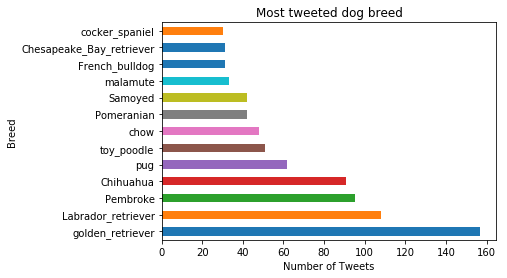

In [457]:
df_breeds['breed'].plot(kind = 'barh')
plt.title('Most tweeted dog breed')
plt.xlabel('Number of Tweets')
plt.ylabel('Breed');

#### Insight 1: Results

We can see that the `golden retriever` is the most tweeted number followed by `labrador`, and `pembroke`. I guess retrievers are really loved and very common!

The lesser of the bunch would be `cocker spaniel` and `chesapeake bay retriever`. However these are also pretty high compared to the rest of the list (we have many unidentified dogs!)


#### Insight 2: Average Favorites on dog breeds

In [539]:
# we extract breeds and favorites to a dataframe
df_fav_breeds = df_master_clean[['breed','favorite_count']]
# Drop the NA
df_fav_breeds = df_fav_breeds[df_fav_breeds.breed != 'NA']
# get above 25 occurances 
df_grouped = df_fav_breeds.groupby('breed').filter(lambda x: len(x) > 25)
# sum total favorites
df_summed = df_grouped.groupby('breed').favorite_count.sum()
df_summed = df_summed.to_frame()
# get total count to divide onfavorite to get the average
df_summed['counts'] = df_breeds['count']

# getting average:
df_summed['average'] = round(df_summed['favorite_count'] / df_summed['counts'],2)
df_summed.sort_values(by =  'average',inplace = True)

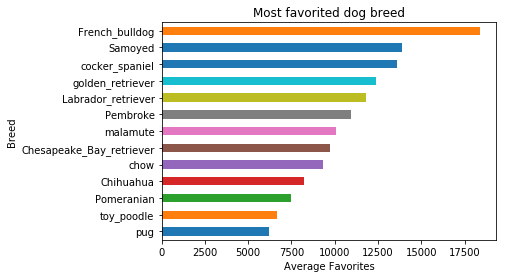

In [547]:
df_summed['average'].plot(kind = 'barh')
plt.title('Most favorited dog breed')
plt.xlabel('Average Favorites')
plt.ylabel('Breed');

#### Insight 2: Results

Even though `golden retriever` and `labrador retriever` has the greatest samples, we can see that it falls short, however it's still a great number of favorites on average!

The `french bulldog` takes the lead with a great margin (equal to 5000 favorites) followed by a close tie between `Samoyed` and `cocker spaniel`.

#### Insight 3: Favorites vs Retweets on tweets

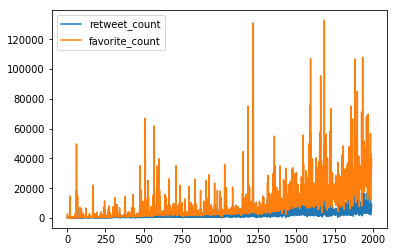

In [544]:
df_retfav = df_master_clean[['retweet_count','favorite_count']]
df_retfav.plot();

#### Insight 3: Results

As expected, it's much more common to favorite than to retweet. That's most likely due to people not wanting to share everything that happens, but you can see a little trend that the more favorites the more retweets (generally) with some exceptions of course

### Visualization:
1. Most used dog name (name_dog) excluding None. 

In [552]:
# we collect the breed occurance in a df.
df_names = df_master_clean['name_dog'].value_counts().to_frame()
df_names.drop('None', inplace = True)
df_names

,name_dog
pupper,223
doggo,72
puppo,28
floofer,3


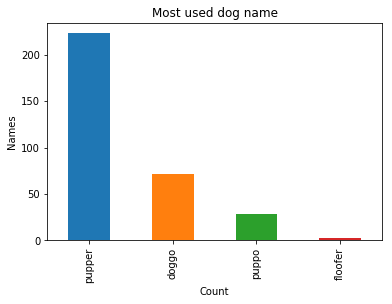

In [553]:
df_names['name_dog'].plot(kind = 'bar')
plt.title('Most used dog name')
plt.xlabel('Count')
plt.ylabel('Names');

##### Results
As we can see, use of pupper is the most used by a great margin! following it would be doggo, puppo coming over, and lastly floofer is the least and rarest used.